In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Max heap implementation
def max_heap(lst, value):
    lst.append(value)  # Add the new value to the end of the heap
    idx = len(lst) - 1  # Get the index of the newly added element

    # Moving the newly added element up the tree as long as it's greater
    # than its parent, maintaining the max heap property
    while idx > 0:
        parent_index = (idx - 1) // 2
        if lst[idx] > lst[parent_index]:
            lst[idx], lst[parent_index] = lst[parent_index], lst[idx]
            idx = parent_index
        else:
            break

# Pop max heap implementation
def pop_max_heap(lst):
    # Checking if list is empty
    if not list:
        return "The array is empty"

    # Checking if there is only one element in the list
    if len(lst) == 1:
        return lst.pop()

    # Maximum element
    max_elem = lst[0]
    # Last element
    last = lst.pop()

    if lst:
        # Moving the last element to the root position
        lst[0] = last
        index = 0
        n = len(lst)

        # Restore the tree by bringing down the element
        while True:
            left = index * 2 + 1
            right = index * 2 + 2
            largest = index

            # Comparing the largest value to the left child
            if left < n and lst[largest] < lst[left]:
                largest = left

            # Comparing the largest value to the right child
            if right < n and lst[largest] < lst[right]:
                largest = right

            # Checking if largest index has been changed
            # No need to swap elements or call function recursively if largest element was not changed
            if largest != index:
                # Swapping the values of the parent with the largest element
                lst[largest], lst[index] = lst[index], lst[largest]
                index = largest
            else:
                break

    # Returning the maximum element that was removed
    return max_elem


# Function that organizes student payload into a dictionary
def student_data(name, student_type, computer_science, math, year, orientation_day):
    return {"Name": name,
            "student_type": student_type,
            "computer_science": computer_science,
            "math": math,
            "year": year,
            "orientation_day": orientation_day}
    
# Function that organizes student address into a dictionary
def student_address(name, street, city, state, zip_code):
    return {"name": name,
            "street": street,
            "city": city,
            "state": state,
            "zip_code": zip_code}
    
# Prioritizing each student
def priority(payload, idx):
    lst_priority = [
        1 if payload["student_type"] == "Graduate" else 0,
        1 if payload["computer_science"] is True else 0,
        1 if payload["math"] is True else 0,
        payload["year"],  # Closer students are graduating - higher the priority
        -payload["orientation_day"],
        # Reversing the orientation day value to give priority to students that register earlier
        idx  # Unique identifier of each student
    ]

    return lst_priority


# Processing each student and admitting by priority criteria
def process_admissions(payload):
    lst = []  #
    admitted_students = []  # Initialize a list for admitted students

    # Enumerating through student requests and prioritizing them
    for idx, student in enumerate(payload):
        priority_student = priority(student, idx)
        max_heap(lst, priority_student)  # Adding every priority to our max heap

    # Admitting students up to a limit 25 based on max heap priorities
    while len(admitted_students) < 25 and len(lst) > 0:
        _, computer_science, math, year, orientation_day, idx = pop_max_heap(lst)
        admitted_students.append(idx)

    return admitted_students

offers = None
# Making offers to admitted students if places become available
def make_offers(payload, admitted_students, dropouts):
    offers = []

    # Checking for admitted students who haven't dropped the class
    for idx, request in enumerate(payload):
        if idx in admitted_students and idx not in dropouts:
            offers.append(request)

    # Filling empty spots with the most qualified students
    while len(offers) < 25:
        # Checking for the next most qualified student who hasn't been previously admitted
        next_student = None
        for index, request in enumerate(payload):
            if index not in admitted_students and index not in dropouts:
                if next_student is None or priority(request, index) > priority(next_student, index):
                    next_student = request

        # If no more qualified students are available, break the loop
        if next_student is None:
            break

        # Marking the student as admitted and add them to the offers list
        admitted_students.append(payload.index(next_student))
        offers.append(next_student)

    return offers


In [8]:
# Create a dictionary with the student data
data = [
    student_data("Billy Pilgrim", "Graduate", False, True, 2, 2),
    student_data("The Tralfamadorian", "Undergraduate", True, True, 4, 1),
    student_data("Tyler Durden", "Graduate", False, False, 3, 3),
    student_data("Arthur Dent", "Auditor", True, False, 0, 4),
    student_data("William S. Burroughs", "Graduate", False, False, 2, 1),
    student_data("Yossarian", "Undergraduate", False, True, 4, 5),
    student_data("Patrick Bateman", "Graduate", True, True, 1, 1),
    student_data("The Hitchhiker", "Auditor", True, False, 0, 5),
    student_data("Ford Prefect", "Graduate", False, False, 4, 2),
    student_data("Anton Chigurh", "Undergraduate", True, True, 4, 3),
    student_data("Holden Caulfield", "Graduate", False, False, 1, 3),
    student_data("Marla Singer", "Auditor", True, True, 2, 4),
    student_data("Randle McMurphy", "Graduate", True, True, 3, 2),
    student_data("Zaphod Beeblebrox", "Undergraduate", False, True, 2, 1),
    student_data("John Dillinger", "Graduate", False, False, 3, 1),
    student_data("Sheriff Ed Tom Bell", "Auditor", True, False, 2, 4),
    student_data("Joseph Heller", "Graduate", False, True, 4, 5),
    student_data("Travis Bickle", "Undergraduate", False, True, 1, 5),
    student_data("Lenny Bruce", "Auditor", True, False, 2, 5),
    student_data("The Narrator", "Graduate", True, False, 0, 1),
    student_data("Marianne Engel", "Undergraduate", True, True, 2, 3),
    student_data("Llewelyn Moss", "Graduate", True, False, 3, 5),
    student_data("Marvin the Paranoid Android", "Undergraduate", False, True, 3, 2),
]

# Create a dictionary with the student address data
student_address = {
    "Name": [
        "Billy Pilgrim", "The Tralfamadorian", "Tyler Durden", "Arthur Dent",
        "William S. Burroughs", "Yossarian", "Patrick Bateman", "The Hitchhiker",
        "Ford Prefect", "Anton Chigurh", "Holden Caulfield", "Marla Singer",
        "Randle McMurphy", "Zaphod Beeblebrox", "John Dillinger", "Sheriff Ed Tom Bell",
        "Joseph Heller", "Travis Bickle", "Lenny Bruce", "The Narrator",
        "Marianne Engel", "Llewelyn Moss", "Marvin the Paranoid Android"
    ],
    "Street Address": [
        "1234 Elm Street", "5678 Oak Avenue", "4321 Maple Lane", "9876 Birch Road",
        "2468 Pine Street", "1357 Cedar Avenue", "8642 Redwood Drive", "9875 Willow Lane",
        "3690 Alder Street", "7523 Birch Avenue", "5210 Cedar Road", "2150 Maple Lane",
        "3033 Elm Street", "6234 Oak Avenue", "7749 Redwood Drive", "1947 Pine Street",
        "1502 Cedar Avenue", "6351 Willow Lane", "8842 Birch Road", "9999 Elm Street",
        "12345 Oak Avenue", "7890 Pine Street", "5678 Cedar Road"
    ],
    "City": [
        "Springfield", "Tralfamadore", "Fight Club City", "London",
        "New York", "Pianosa", "New York", "Earth",
        "Betelgeuse", "No Country", "New York", "Wilmington",
        "Salem", "Betelgeuse", "Chicago", "Laredo",
        "New York", "New York", "Los Angeles", "San Francisco",
        "Toronto", "Austin", "London"
    ],
    "State": [
        "Illinois", "Outer Space", "Anarchy", "England",
        "New York", "Italy", "New York", "Milky Way",
        "Galaxy", "Nowhere", "New York", "Delaware",
        "Oregon", "Galaxy", "Illinois", "Texas",
        "New York", "New York", "California", "California",
        "Ontario", "Texas", "England"
    ],
    "ZIP Code": [
        "62701", "12345", "54321", "SW1A 1AA",
        "10001", "12345", "10002", "54321",
        "12345", "54321", "10003", "19801",
        "97301", "12345", "60601", "78040",
        "10004", "10005", "90001", "94101",
        "M5V 2L7", "78701", "SW1A 2AA"
    ]
}

# Create a DataFrame from the dictionary
addresses_df = pd.DataFrame(student_address)
students_df = pd.DataFrame(data)
offers_df = pd.DataFrame(None)


In [9]:
# MAIN SCRIPT
admitted_students = process_admissions(data)

# print("Admitted students in order:")
# for index, idx in enumerate(admitted_students):
#     print(index+1, payload[idx]["name"])
# Simulating dropouts

dropouts = [admitted_students[3], admitted_students[17]]

def process_offers(data, admitted_students, dropouts, addresses_df):
    offers = make_offers(data, admitted_students, dropouts)
    offers_df = pd.DataFrame(offers)  # Create the DataFrame locally
    # Merge the offers DataFrame with the addresses DataFrame using an inner join
    offers_df = pd.merge(offers_df, addresses_df, on="Name", how="inner")
    for index, offer in enumerate(offers_df.iterrows()):
        print(index + 1, offer[1]["Name"], offer[1]["Street Address"], offer[1]["City"], offer[1]["State"], offer[1]["ZIP Code"])
        
process_offers(data, admitted_students, dropouts, addresses_df)


1 Billy Pilgrim 1234 Elm Street Springfield Illinois 62701
2 The Tralfamadorian 5678 Oak Avenue Tralfamadore Outer Space 12345
3 Tyler Durden 4321 Maple Lane Fight Club City Anarchy 54321
4 William S. Burroughs 2468 Pine Street New York New York 10001
5 Yossarian 1357 Cedar Avenue Pianosa Italy 12345
6 Patrick Bateman 8642 Redwood Drive New York New York 10002
7 The Hitchhiker 9875 Willow Lane Earth Milky Way 54321
8 Ford Prefect 3690 Alder Street Betelgeuse Galaxy 12345
9 Anton Chigurh 7523 Birch Avenue No Country Nowhere 54321
10 Holden Caulfield 5210 Cedar Road New York New York 10003
11 Marla Singer 2150 Maple Lane Wilmington Delaware 19801
12 Randle McMurphy 3033 Elm Street Salem Oregon 97301
13 Zaphod Beeblebrox 6234 Oak Avenue Betelgeuse Galaxy 12345
14 John Dillinger 7749 Redwood Drive Chicago Illinois 60601
15 Sheriff Ed Tom Bell 1947 Pine Street Laredo Texas 78040
16 Joseph Heller 1502 Cedar Avenue New York New York 10004
17 Travis Bickle 6351 Willow Lane New York New York 10

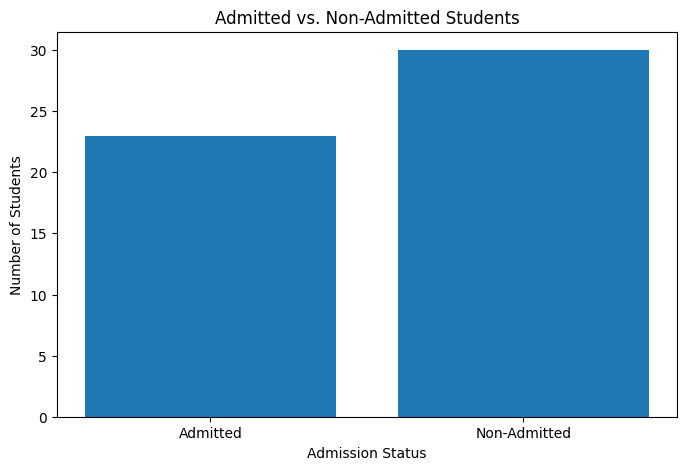

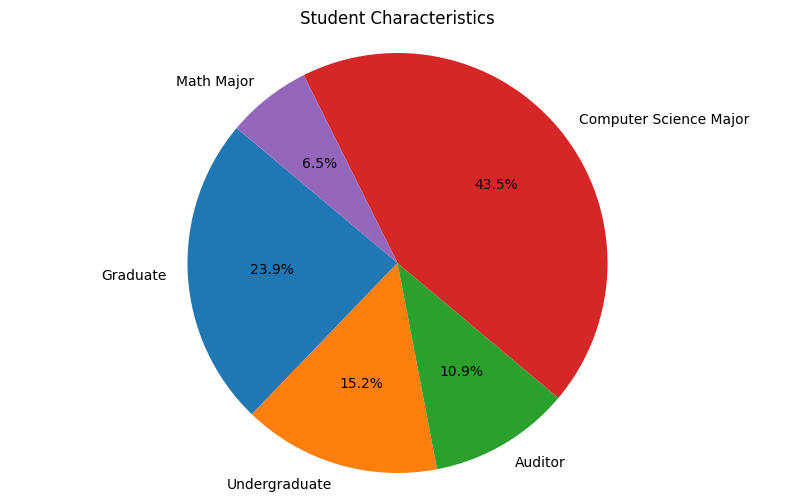

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data 
admitted_students = 23
non_admitted_students = 30
student_characteristics = {
    'Graduate': 11,
    'Undergraduate': 7,
    'Auditor': 5,
    'Computer Science Major': 20,
    'Math Major': 3,
}

# Admitted vs Non-Admitted Graph
plt.figure(figsize=(8, 5))
admission_status = ['Admitted', 'Non-Admitted']
students_count = [admitted_students, non_admitted_students]
plt.bar(admission_status, students_count)
plt.title('Admitted vs. Non-Admitted Students')
plt.xlabel('Admission Status')
plt.ylabel('Number of Students')
plt.show()


# Student Characteristics Graph
plt.figure(figsize=(10, 6))
characteristics = list(student_characteristics.keys())
student_counts = list(student_characteristics.values())
plt.pie(student_counts, labels=characteristics, autopct='%1.1f%%', startangle=140)
plt.title('Student Characteristics')
plt.axis('equal')  
plt.show()



